<a href="https://colab.research.google.com/github/PreyeaRegmi/GT/blob/main/TSC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

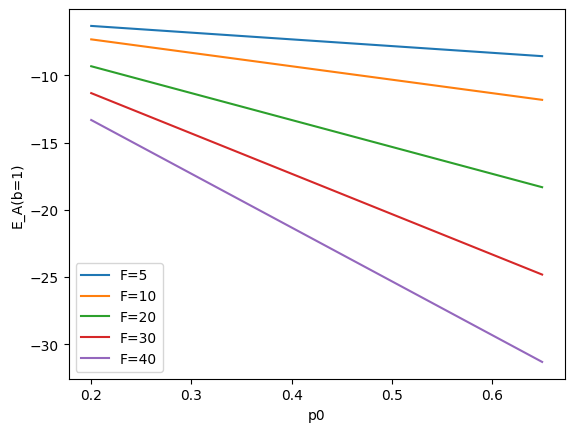

In [2]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

# Fig. 4. The impact of p1 and F on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 20000
V = 49.3395
R = 27.7077

A = 0.3205

Cd = 5
T = 2
p0 = 0.2

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = [5, 10, 20, 30,40]  # Updated range for B
P_range = np.arange(0.2,0.7,0.05)

for F in F_range:
    for p1 in P_range:
        sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p1) - A
        Fi[F].append(p1)
        Ei[F].append(sum1 - Cd)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'F={F}')

ax.set_xlabel('p0')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()


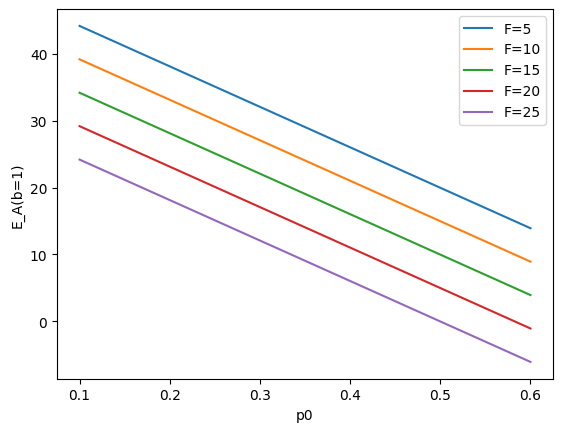

In [3]:
import numpy as np
import matplotlib.pyplot as plt


from collections import defaultdict


# Fig. 5. The impact of p0 and CD on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 2000
V = 52.4033
R = 55.5352

A = 0.3009

T = 2
p1 = 0.7

F=5

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = [5, 10, 15, 20,25]  # Updated range for B
P_range = np.arange(0.1,0.7,0.1)

for Cd in F_range:
    for p0 in P_range:
        sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p0 + (1 - p0) * R) - A
        Fi[Cd].append(p0)
        Ei[Cd].append(sum1 - Cd)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'F={F}')

ax.set_xlabel('p0')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()



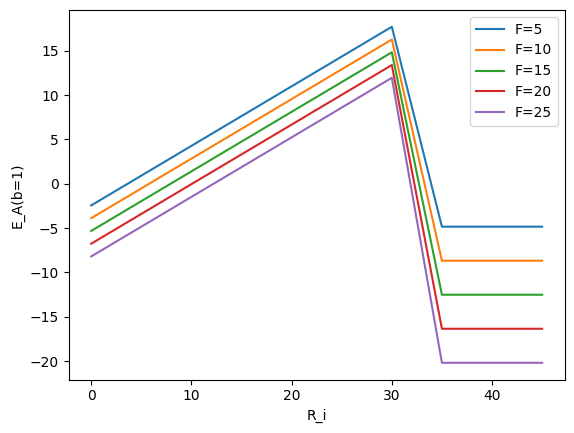

In [4]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

# Fig. 6. The impact of R and F on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 20000
V = 31.1
A = 0.005
Cd = 1
T = 2
p0 = 0.3
p1 = 0.8



Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = [5, 10, 15, 20, 25]  # Updated range for B
R_range = range(0,50,5) # Updated range for B

for F in F_range:
    for R in R_range:
        if V >= R:
            sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p0 + (1 - p0) * R) - A
        elif V < R:
            sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p1) - A

        Fi[F].append(R)
        Ei[F].append(sum1 - Cd)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'F={F}')

ax.set_xlabel('R_i')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()


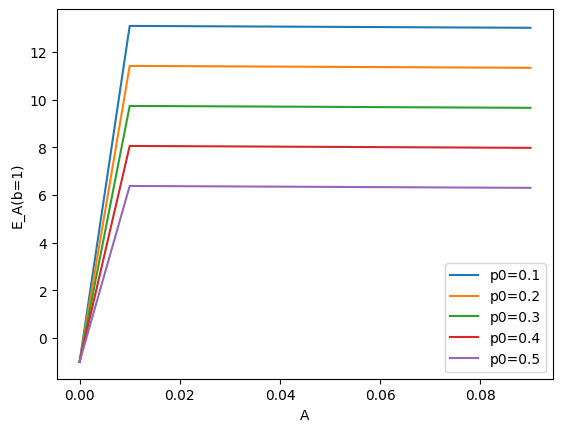

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


#Fig. 7. The impact of A and p0 on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 10000
V=10.795

R = 15.774
Cd = 1
T = 2
p1 = 0.7
F=1


Fi = defaultdict(list)
Ei = defaultdict(list)

p_range = [0.1,0.2,0.3,0.4,0.5]
A_Range = np.arange(0,0.1,0.01)

for p0 in p_range:
    for A in A_Range:
        sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p0 + (1 - p0) * R) - A
        Fi[p0].append(A)
        Ei[p0].append(np.sum(sum1)- Cd)

# Plotting
fig, ax = plt.subplots()
for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'p0={F}')

ax.set_xlabel('A')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()



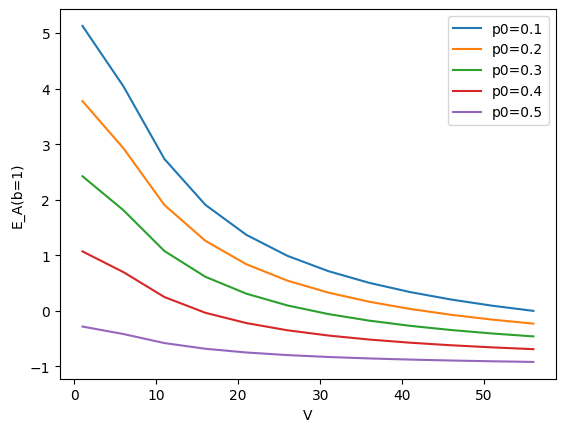

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


#Fig. 8. The impact of V and p0 on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 200
R = 7.5345
A = 0.0521
Cd = 1
T = 2
p1 = 0.7
F=6



Fi = defaultdict(list)
Ei = defaultdict(list)

p_range = [0.1,0.2,0.3,0.4,0.5]
V_range = range(1,60,5)

for p0 in p_range:
    for V in V_range:
        sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p0 + (1 - p0) * R) - A
        Fi[p0].append(V)
        Ei[p0].append(np.sum(sum1)- Cd)

# Plotting
fig, ax = plt.subplots()
for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'p0={F}')

ax.set_xlabel('V')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()



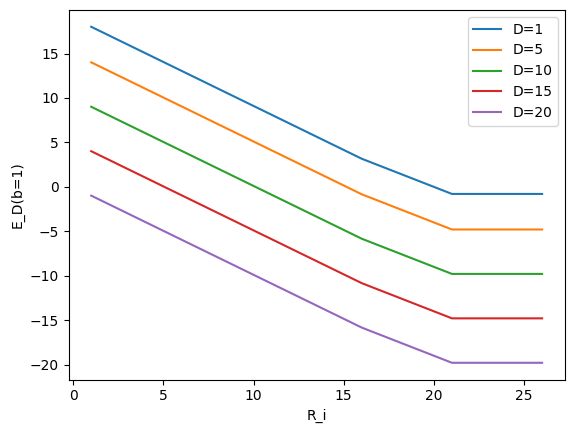

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 10. The impact of Ri and D on the ith target’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 20000
V = 20.0
A = 0.0046


Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
D_range = [1,5, 10, 15, 20]  # Updated range for B
R_range = range(1,30,5) # Updated range for B

for D in D_range:
    for R in R_range:
        if(V>=R):
          sum1 = V - D - (1 - np.exp(-1 * u * A / V)) * R
        else:
          sum1 = V - D - (1 - np.exp(-1 * u * A / V)) * V

        Fi[D].append(R)
        Ei[D].append(sum1)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'D={F}')

ax.set_xlabel('R_i')
ax.set_ylabel('E_D(b=1)')
ax.legend()
plt.show()




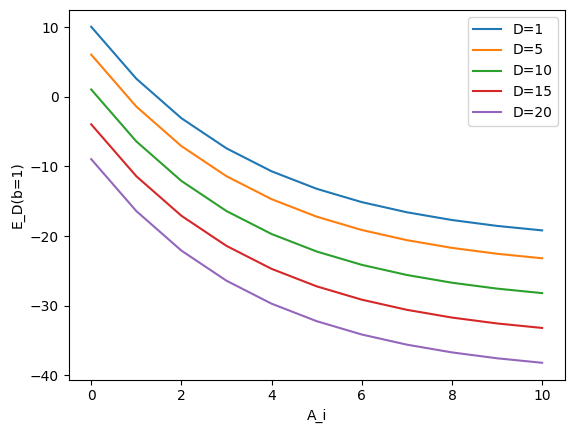

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 11. The impact of Ai and D on the ith target’s benefit.

np.random.seed(42)  # Set seed for reproducibility


u = 3
# But in paper it is set to 20000

R = 31.288
V=11.0344

Fi = defaultdict(list)
Ei = defaultdict(list)

D_range = [1,5, 10, 15, 20]  # Updated range for B
A_Range = range(0,11,1) # Updated range for B

for D in D_range:
    for A in A_Range:
        sum1 = V - D - (1 - np.exp(-1 * u * A / V)) * R
        Fi[D].append(A)
        Ei[D].append(sum1)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'D={F}')

ax.set_xlabel('A_i')
ax.set_ylabel('E_D(b=1)')
ax.legend()
plt.show()





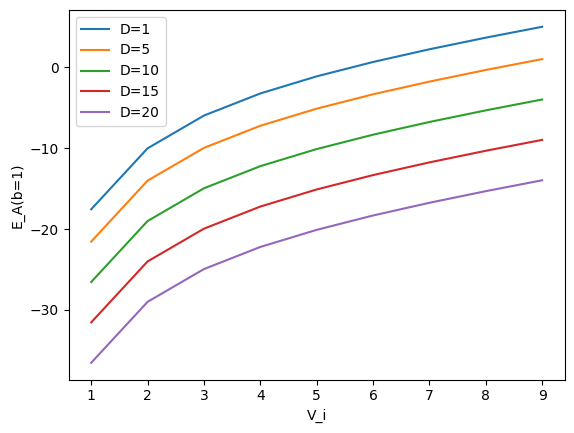

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 12. The impact of Vi and D on the ith target’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 200
R = 27.1447
A = 0.0052


Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
D_range = [1,5, 10, 15, 20]  # Updated range for B
V_Range = range(1,10,1) # Updated range for B

for D in D_range:
    for V in V_Range:
        sum1 = V - D - (1 - np.exp(-1 * u * A / V)) * R
        Fi[D].append(V)
        Ei[D].append(sum1)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'D={F}')

ax.set_xlabel('V_i')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()



